# 01. Linear Regression
### 공부 시간에 따른 시험 점수

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [4]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [8]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터(독립 변수)
Y = dataset.iloc[:, -1].values #마지막 컬럼 데이터(종속 변수 -결과)

In [9]:
X,Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체 생성
reg.fit(X, Y) # 학습 (모델 생성)

LinearRegression()

In [13]:
Y_pred = reg.predict(X) # X에 대한 예측 값
Y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

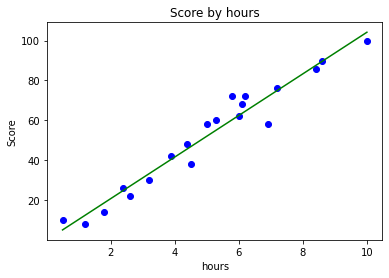

In [16]:
plt.scatter(X,Y, color='blue') #산점도
plt.plot(X, Y_pred, color='green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('Score') # Y축 이름
plt.show()

In [18]:
print('9시간 공부 했을 때 예상 점수 : ', reg.predict([[9]])) #2차원 배열 형태 [[9], [8], [7]]

9시간 공부 했을 때 예상 점수 :  [93.77478776]


In [19]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [20]:
reg.intercept_ # Y 절편(b)

-0.21848470286721522

y = mx + b -> y=10.4436x - 0.21

### 데이터 세트 분리

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [3]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #훈련 80 : 테스트 20 으로 분리

In [5]:
X, len(X) #전체 데이터 X 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [6]:
X_train, len(X_train) # 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [7]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [8]:
Y , len(Y) #전체 데이터 Y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [10]:
Y_train, len(Y_train) # 훈련 세트 Y, 개수

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [11]:
Y_test, len(Y_test) # 테스트 세트 Y, 개수

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체 생성

In [14]:
reg.fit(X_train, Y_train) # 훈련 세트 학습 (모델 생성)

LinearRegression()

### 데이터 시각화 ( 훈련 세트 )

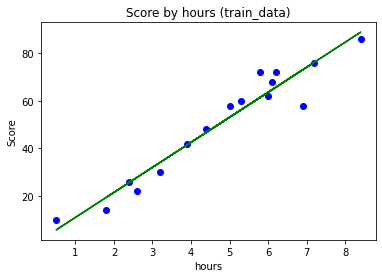

In [16]:
plt.scatter(X_train,Y_train, color='blue') #산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train_data)') # 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('Score') # Y축 이름
plt.show()

### 데이터 시각화 ( 테스트 세트 )

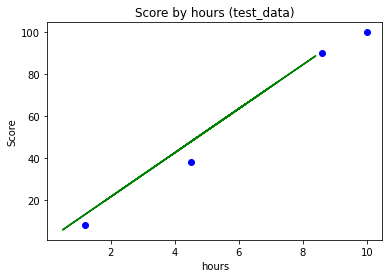

In [17]:
plt.scatter(X_test,Y_test, color='blue') #산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (test_data)') # 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('Score') # Y축 이름
plt.show()

In [18]:
reg.coef_

array([10.49161294])

In [20]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [21]:
reg.score(X_test, Y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [22]:
reg.score(X_train, Y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668